In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Datasets:
Stars: https://www.kaggle.com/deepu1109/star-dataset
Skyserver: https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

### Classifying Star Type

This part of the project will be using the Stars dataset.

Objectives:
- Use features of stars to identify star type
- Conduct k-means clustering and add results as additional variable
- Identify best model for the dataset
- Train a model that predicts star type

In [2]:
stars = pd.read_csv("stars_data.csv")
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
stars["Star type"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [5]:
stars["Spectral Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [6]:
stars["Star color"].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Since we have a categorical column with text data, we should encode it for training models. A simple way to do this is to get dummy variables based on the categorical features. Below, we take the features "Spectral Class" and "Star color" and transform them into multiple variables based on the values of the features. For example, Spectral Class contains classifications of the stars by their spectrum and luminosity and are classified as below:

Source: https://lweb.cfa.harvard.edu/~pberlind/atlas/htmls/note.html

In [7]:
pd.read_html("https://lweb.cfa.harvard.edu/~pberlind/atlas/htmls/note.html")[0].rename(columns={"Spectral Type": "Spectral Class"})

,Spectral Class,Surface Temperature,Distinguishing Features
0,O,"> 25,000K",H; HeI; HeII
1,B,"10,000-25,000K",H; HeI; HeII absent
2,A,"7,500-10,000K",H; CaII; HeI and HeII absent
3,F,"6,000-7,500K","H; metals (CaII, Fe, etc)"
4,G,"5,000-6,000K",H; metals; some molecular species
5,K,"3,500-5,000K",metals; some molecular species
6,M,"< 3,500K",metals; molecular species (TiO!)
7,C,"< 3,500K",metals; molecular species (C2!)


Instead of having one feature called "Spectral Class", we separate the values of the feature into 8 different binary features that indicate whether an observation is the respective feature or not (1 or 0). In this case for example, "Spectral Class" is separated into "Spectral Class_A", "Spectral Class_B", "Spectral Class_F", etc. If an observation's "Spectral Class" was F, then "Spectral Class_F" would be 1, and the rest would be 0. The same transformation is applied to "Star color" as well.

In [11]:
stars_dummy_df = pd.get_dummies(stars, columns = ['Spectral Class', 'Star color'] )
stars_dummy_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

X = stars_dummy_df.drop(columns=["Star type"])
y = stars_dummy_df[["Star type"]]

For this part of the project, I'll be using k-means clustering to find clusters. K-means finds similarities across features and groups them together into clusters. The results will be added to the dataframe as an additional feature, which hopefully increases the accuracy of the model later on.

### Getting Optimal # of Clusters for K-Means

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


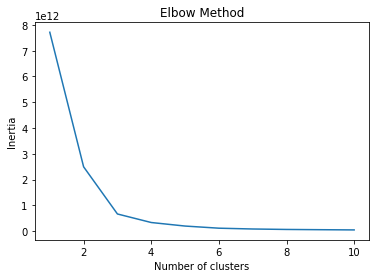

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow diagram above shows us that the majority of variation in the data lies within 4 clusters. Clusters 1-3 make up most of that variation. So, we can move forward with setting the optimal number of clusters to 4 for the model. 

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2,
       3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3])

The model classified all observations into clusters 0,1,2, or 3.

### Visualizing Clusters

The plot below shows where each clusters are centered around

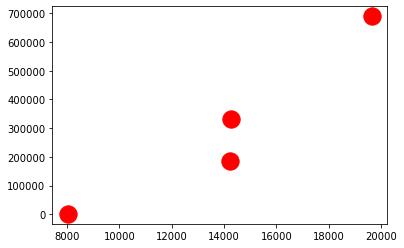

In [96]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [98]:
# adding cluster results into features dataset as variable "Cluster"
X["Cluster"] = pred_y
X.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,...,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Cluster
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = stars_dummy_df.drop(columns=["Star type"])
y = stars_dummy_df[["Star type"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=50,random_state=42, criterion='entropy',max_depth=None, min_samples_split=2),
    svm.SVC(gamma="scale",kernel="rbf"),
    GaussianNB(),
    DecisionTreeClassifier(),
    LogisticRegression()
    
    
]

model_names = ['rf','svm','dt','nb', 'lr']

In [ ]:
accuracy = []
for model in models:
    
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        # evaluate predictions
        accuracy.append(model.score(X_test, y_test))
        
for i in range(5):
    print("Accuracy for " + model_names[i] + ": %.2f%%" % (accuracy[i] * 100.0))